# Análise Bivariada

- Hipótese: Clientes com Contrato do Tipo Mensal possuem maior churn rate

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Importando o dataset
df_clientes = pd.read_csv('../../docs/datasets_aula/churn_customers.csv')
df_contratos = pd.read_csv('../../docs/datasets_aula/churn_contracts.csv')
df_servicos = pd.read_csv('../../docs/datasets_aula/churn_services.csv')

df_churn = pd.merge(df_clientes, df_contratos, on='customerID', how='left')
df_churn = pd.merge(df_churn, df_servicos, on='customerID', how='left')

In [2]:
# Corrige valores nulos de TotalCharges
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(0)


In [3]:
pd.crosstab(df_churn['Churn'], df_churn['Contract'], margins=True, margins_name='Total')

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


Contract  Month-to-month  One year  Two year
Churn                                       
No              0.429068  0.252609  0.318322
Yes             0.885500  0.088818  0.025682
Total           0.550192  0.209144  0.240664


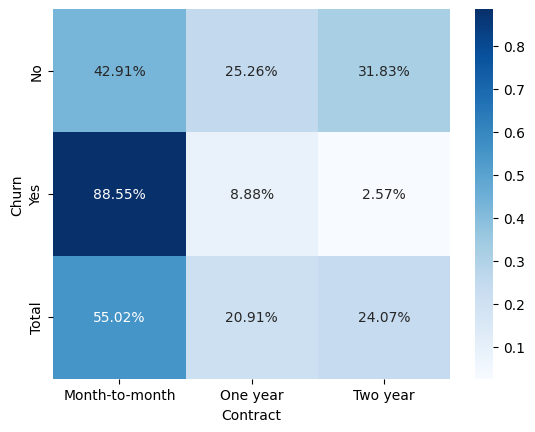

In [4]:
# Construindo a matriz de contingência proporcional
contingencia_proporcional = pd.crosstab(df_churn['Churn'], df_churn['Contract'], normalize='index', margins=True, margins_name='Total')
print(contingencia_proporcional)
# Plotando a matriz de contingência proporcional
sns.heatmap(contingencia_proporcional, annot=True, cmap='Blues', fmt='.2%')
plt.show()

- A partir da tabela de contingência proporcional, podemos observar que os clientes com contrato mensal possuem um churn rate maior do que os clientes com contrato anual.

## Avaliar a correlação entre as variáveis categóricas

### Executar um teste de hipótese chamado Chi-Square ou Qui-Quadrado de Pearson

Num teste de hipótese, duas hipósteses são formuladas:
- Hipótese nula (H0): Não há associação entre as variáveis
- Hipótese alternativa (H1): Há associação entre as variáveis

O teste de hipótese Chi-Square é usado para determinar se existe uma associação significativa entre duas variáveis categóricas.
Quando o p-value é menor que 0.05, rejeitamos a hipótese nula e aceitamos a hipótese alternativa.



In [5]:
# Gerar um DF da Crosstab (sem total)
contingencia_sem_total = pd.crosstab(df_churn['Churn'], df_churn['Contract'], margins=False)
contingencia_sem_total

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [6]:
# Calcular o teste de hipótese Chi-Square
resultado_chi2 = chi2_contingency(contingencia_sem_total)
print(resultado_chi2)
# Calcular o p-value
p_value = resultado_chi2[1]
print(p_value)


Chi2ContingencyResult(statistic=np.float64(1184.5965720837926), pvalue=np.float64(5.863038300673391e-258), dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))
5.863038300673391e-258


In [7]:
# Criar um score para o churn e o contrato
score_churn_contrato = pd.Series(resultado_chi2[0])
print(score_churn_contrato)

0    1184.596572
dtype: float64


In [8]:
# Criar um pvalue para o churn e o contrato
pvalues_churn_contrato = pd.Series(resultado_chi2[1])
print(pvalues_churn_contrato)

0    5.863038e-258
dtype: float64


In [9]:
# Apresentar numeros decimais sem a notação científica
pd.set_option('display.float_format', lambda x: '{:.15f}'.format(x))

In [10]:
# Criar Dataframe com os scores e os pvalues
df_churn_contrato = pd.DataFrame({'score': score_churn_contrato, 'pvalue': pvalues_churn_contrato})
df_churn_contrato

,score,pvalue
0,1184.596572083792580,0.000000000000000


O teste de hipótese Chi-Square atesta que há uma associação significativa entre o churn e o contrato. P-value é 0.000000000000000, o que indica que há uma associação significativa entre o churn e o contrato.

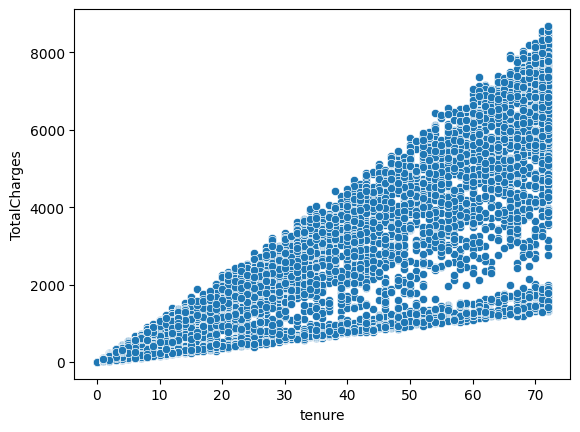

np.float64(0.8261783979502418)

In [12]:
# Criar um scatter plot entre Tenure e TotalCharges
sns.scatterplot(x=df_churn['tenure'], y=df_churn['TotalCharges'])
plt.show()

In [13]:
# Calcular a correlação entre Tenure e TotalCharges
df_churn['tenure'].corr(df_churn['TotalCharges'])

np.float64(0.8261783979502418)

In [14]:
# Spearman
df_churn['tenure'].corr(df_churn['TotalCharges'], method='spearman')
print(df_churn['tenure'].corr(df_churn['TotalCharges'], method='spearman'))
# Kendall
df_churn['tenure'].corr(df_churn['TotalCharges'], method='kendall')
print(df_churn['tenure'].corr(df_churn['TotalCharges'], method='kendall'))

0.8896957900597577
0.7348547875506766
